# ANNs for Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn

### Create Data

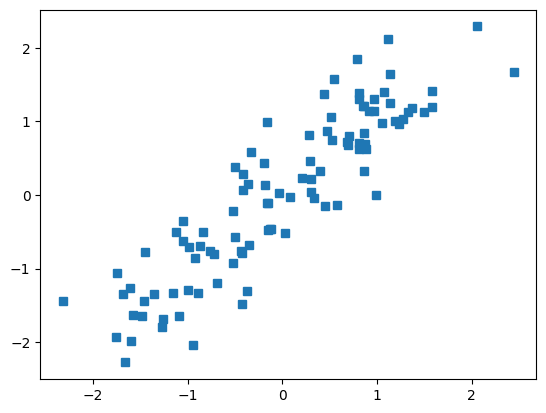

In [3]:
N = 100
x = torch.randn(N, 1)
y = x + 0.5 * torch.randn(N, 1)

plt.plot(x,y,'s')
plt.show()

### Build Model

In [8]:
model1 = nn.Sequential(
    nn.Linear(1,1,),
    nn.ReLU(),
    nn.Linear(1,1),
)

model1

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [9]:
lr = 0.05

loss_fn = nn.MSELoss()

#optimizer 
optimizer = torch.optim.SGD(model1.parameters(),lr = lr)

In [14]:
epochs = 100
losses = torch.zeros(epochs)

for i in range(epochs):

    yhat = model1(x)
    loss = loss_fn(yhat, y)
    losses[i] = loss 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {i+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/100, Loss: 0.2914
Epoch 2/100, Loss: 0.2901
Epoch 3/100, Loss: 0.2889
Epoch 4/100, Loss: 0.2876
Epoch 5/100, Loss: 0.2864
Epoch 6/100, Loss: 0.2851
Epoch 7/100, Loss: 0.2839
Epoch 8/100, Loss: 0.2826
Epoch 9/100, Loss: 0.2814
Epoch 10/100, Loss: 0.2802
Epoch 11/100, Loss: 0.2790
Epoch 12/100, Loss: 0.2779
Epoch 13/100, Loss: 0.2769
Epoch 14/100, Loss: 0.2759
Epoch 15/100, Loss: 0.2749
Epoch 16/100, Loss: 0.2739
Epoch 17/100, Loss: 0.2730
Epoch 18/100, Loss: 0.2720
Epoch 19/100, Loss: 0.2712
Epoch 20/100, Loss: 0.2705
Epoch 21/100, Loss: 0.2699
Epoch 22/100, Loss: 0.2693
Epoch 23/100, Loss: 0.2687
Epoch 24/100, Loss: 0.2681
Epoch 25/100, Loss: 0.2675
Epoch 26/100, Loss: 0.2670
Epoch 27/100, Loss: 0.2664
Epoch 28/100, Loss: 0.2659
Epoch 29/100, Loss: 0.2653
Epoch 30/100, Loss: 0.2647
Epoch 31/100, Loss: 0.2642
Epoch 32/100, Loss: 0.2638
Epoch 33/100, Loss: 0.2633
Epoch 34/100, Loss: 0.2628
Epoch 35/100, Loss: 0.2623
Epoch 36/100, Loss: 0.2619
Epoch 37/100, Loss: 0.2615
Epoch 38/1

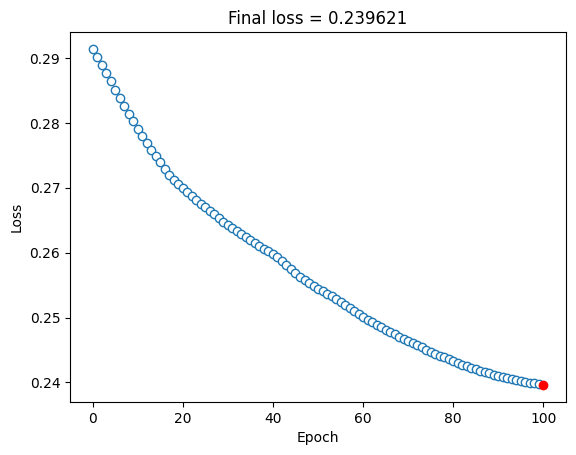

In [16]:
pred = model1(x)

testloss = (pred - y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(epochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

